# The Wonderful World of Coffee

This notebook begins to explore a coffee dataset that has been scraped by a reddit user.

The data source is below

https://github.com/jldbc/coffee-quality-database

First things first, lets import our libraries and take a peek at our data.


In [65]:
#Add library references
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [70]:
#Upload Data

df_arabica = pd.read_csv('https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv') # read in the arabicaica data
df_rob = pd.read_csv('https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_data_cleaned.csv') # read in the Robusta data
#Quick Column rename
df_arabica.rename(columns={'Unnamed: 0':'Id'}, inplace=True)
df_rob.rename(columns={'Unnamed: 0':'Id'}, inplace=True)


#Changing datatypes
conv_dict = {'Species': str,
                'Owner': str,
                'Mill': str,
                'Company': str,
                'Region': str,
                'Producer': str,
                'Variety': str
                }
df_arabica = df_arabica.astype(conv_dict)
df_arabica.dtypes



Id                         int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

Now that we've got the data inputted, let's begin our EDA process by looking at our datatypes and
overall shape of the data.


In [71]:
#arabica Stats
#print(df_arabica.head().append(df_arabica.tail()), "\n")
print("Structure of arabica:\n",df_arabica.shape,"\n")
print("Summary Statistic's:\n",df_arabica.describe(),"\n")
print("Count of missing arabica values:\n",df_arabica.isnull().sum().sort_values(ascending=False),"\n")

#Rob Stats
#print(df_rob.head().append(df_arabica.tail()), "\n")
print("Structure of Robusta:\n",df_rob.shape,"\n")
print("Summary Statistic's:\n",df_rob.describe(),"\n")
print("Count of missing Robusta values:\n",df_rob.isnull().sum().sort_values(ascending=False),"\n")

# #For loop to reset the id field
# arabicamax_ID = df_arabica['Id'].idxmax()
# 
# For x in df_rob['Id']:
#     print (x)
#     #df_rob['Id'] = arabicamax_ID + 1 
#     
# df_comb = df_arabica.append(df_rob)


Structure of arabica:
 (1311, 44) 

Summary Statistic's:
                 Id  Number.of.Bags        Aroma       Flavor   Aftertaste  \
count  1311.000000     1311.000000  1311.000000  1311.000000  1311.000000   
mean    656.000763      153.887872     7.563806     7.518070     7.397696   
std     378.598733      129.733734     0.378666     0.399979     0.405119   
min       1.000000        0.000000     0.000000     0.000000     0.000000   
25%     328.500000       14.500000     7.420000     7.330000     7.250000   
50%     656.000000      175.000000     7.580000     7.580000     7.420000   
75%     983.500000      275.000000     7.750000     7.750000     7.580000   
max    1312.000000     1062.000000     8.750000     8.830000     8.670000   

           Acidity         Body      Balance   Uniformity   Clean.Cup  \
count  1311.000000  1311.000000  1311.000000  1311.000000  1311.00000   
mean      7.533112     7.517727     7.517506     9.833394     9.83312   
std       0.381599     0.3592

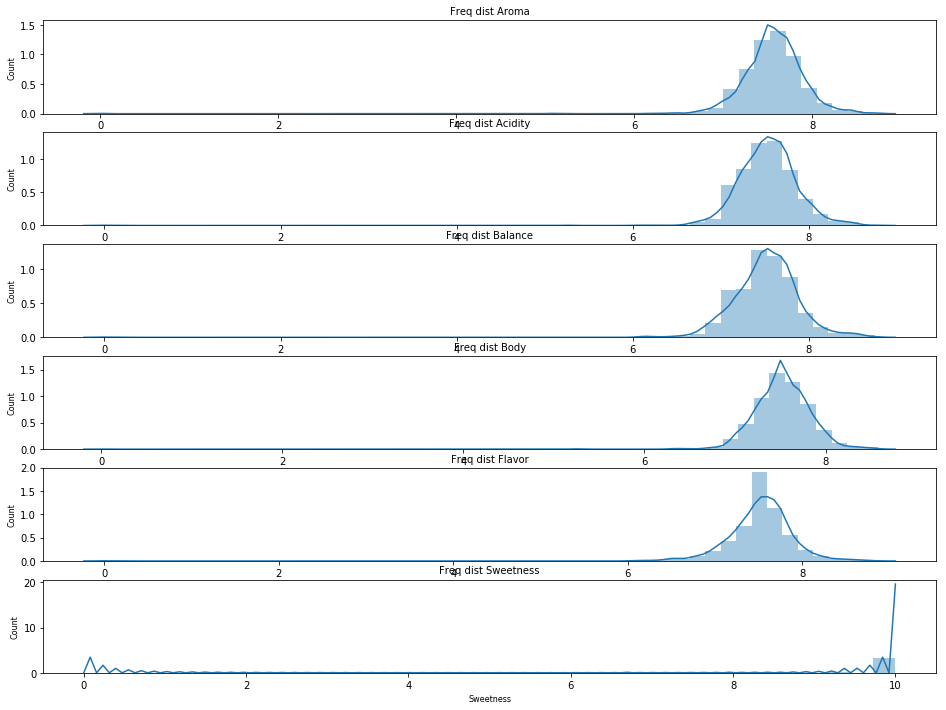

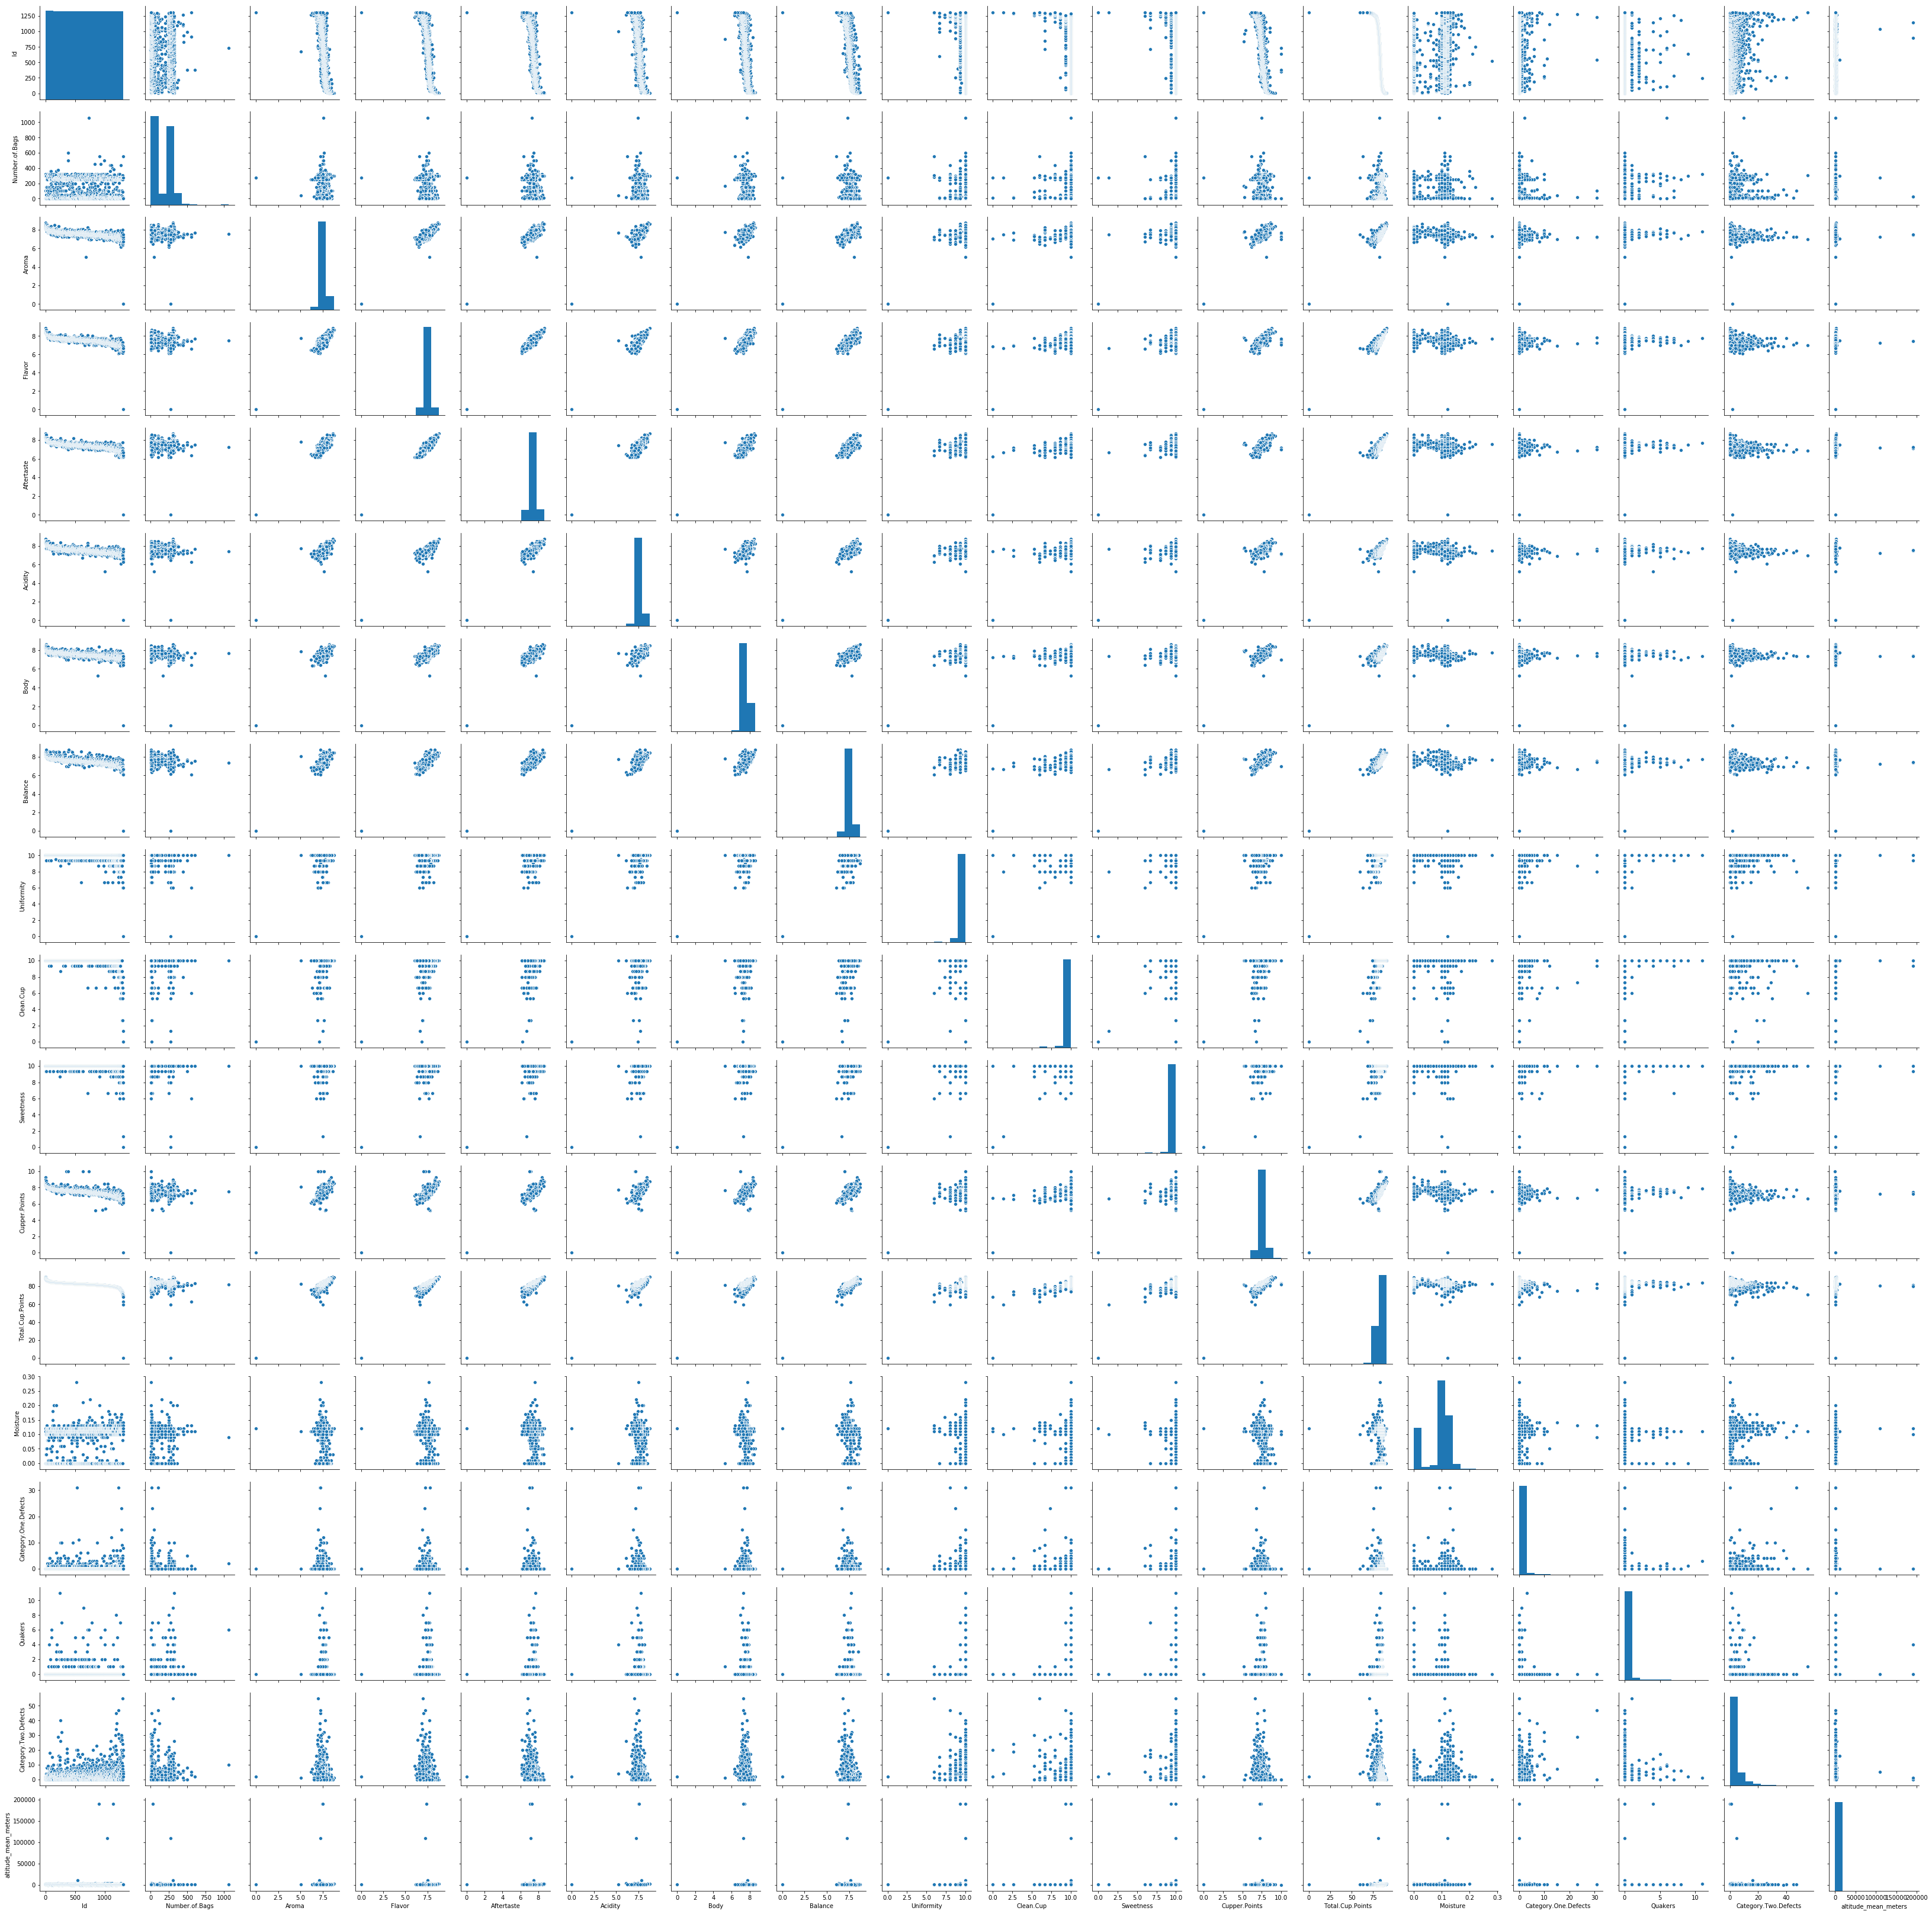

In [72]:
#some initial plots 

col_names = ['Aroma','Acidity','Balance', 'Body', 'Flavor', 'Sweetness']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df_arabica[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

#Huge pairplot matrix.  Probably need to whittle down the attributes a bit first.Example drops below

df_arabica = df_arabica.drop(['Lot.Number', 'altitude_low_meters', 'altitude_high_meters'], axis=1)
sns.pairplot(df_arabica)


Well it seems as though we still have too many variables.  Lets divy them up into numerical and
categorical.  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168780A15C0>,
      dtype=object)

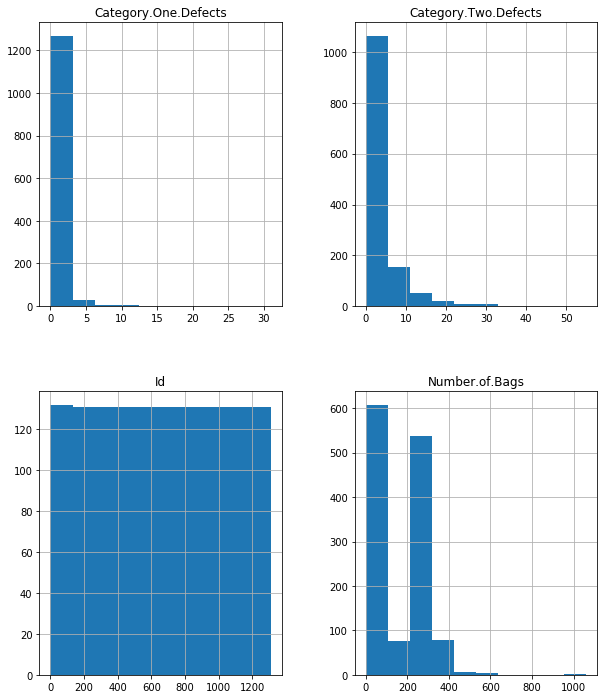

In [69]:
df_num = df_arabica.select_dtypes(include=['int64'])
df_num.hist(figsize =(10,12))

# df_cat = df_arabica.select_dtypes(include=['object'])
# df_cat.hist(figsize =(10,12))


